In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import sys
today = str(datetime.datetime.now().date())
print(today)
%matplotlib inline

2018-07-05


In [8]:
CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
PROJ_ROOT = os.path.join(CURR_PATH, os.pardir)
print(PROJ_ROOT)
DATA_RAW = os.path.join(PROJ_ROOT, "data", "raw")
PROCESSED = os.path.join(PROJ_ROOT, "data", "processed")
REPORTS = os.path.join(PROJ_ROOT, "reports")
FIGS = os.path.join(REPORTS, "figures")
path_components = PROJ_ROOT.split(os.sep)
ROOT = os.sep.join(path_components[:path_components.index("analyses")])

sys.path.append(os.path.join(ROOT, 'modules'))

import stocks as stocks
import style as style
style.set_style()

C:\Users\orn.hjartarson\GitHub\StockMarket\analyses\clustering\notebooks\..
Style set


In [12]:
print('making report')
df = pd.read_pickle(os.path.join(DATA_RAW, 'df.pkl'), compression = 'gzip')
print(df.info())

making report
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61317 entries, 0 to 61316
Data columns (total 7 columns):
datetime    61317 non-null datetime64[ns]
stock       61317 non-null object
open        61317 non-null float64
high        61317 non-null float64
low         61317 non-null float64
close       61317 non-null float64
volume      61317 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 3.3+ MB
None


In [35]:
df_stock = df.groupby(['datetime', 'stock'])['close'].sum().unstack().ffill().bfill()
df_stock = (df_stock - df_stock.min()) / (df_stock.max() - df_stock.min())

df_stock.head()

stock,AAK,ABB,ACAN-B,ACTI,ADDT-B,AF-B,ALFA,ALIV-SDB,ANOD-B,ANOT,...,VICP-B,VICP-PREF,VIT-B,VITR,VOLV-A,VOLV-B,VRG-B,WALL-B,WIHL,XANO-B
datetime,,,,,,,,,,,,,,,,,,,,,
2017-06-28 17:30:00,0.704758,0.742291,0.165680,0.607843,0.187970,0.184615,0.087459,0.158036,0.423875,0.206321,...,0.063636,0.641975,0.000000,0.731305,0.417127,0.415730,0.628319,0.775076,0.705627,0.071203
2017-06-29 17:30:00,0.686081,0.629956,0.082840,0.568627,0.150376,0.128205,0.011551,0.144643,0.484429,0.232955,...,0.072727,0.543210,0.000000,0.706878,0.262431,0.269663,0.486726,0.729483,0.703890,0.083861
2017-06-30 17:30:00,0.686800,0.616740,0.059172,0.590018,0.195489,0.156410,0.000000,0.150000,0.441176,0.193004,...,0.054545,0.444444,0.025641,0.698154,0.284530,0.275281,0.433628,0.784195,0.713442,0.069620
2017-07-03 17:30:00,0.686800,0.658590,0.260355,0.581105,0.150376,0.179487,0.019802,0.189286,0.423875,0.174361,...,0.063636,0.493827,0.128205,0.684196,0.348066,0.351124,0.486726,0.772036,0.713442,0.050633
2017-07-04 17:30:00,0.686800,0.632159,0.130178,0.590018,0.112782,0.123077,0.016502,0.173214,0.302768,0.158381,...,0.045455,0.530864,0.192308,0.678962,0.328729,0.323034,0.504425,0.778116,0.717784,0.037975


In [36]:
days, stocks = df_stock.shape
print(days, stocks)

252 245


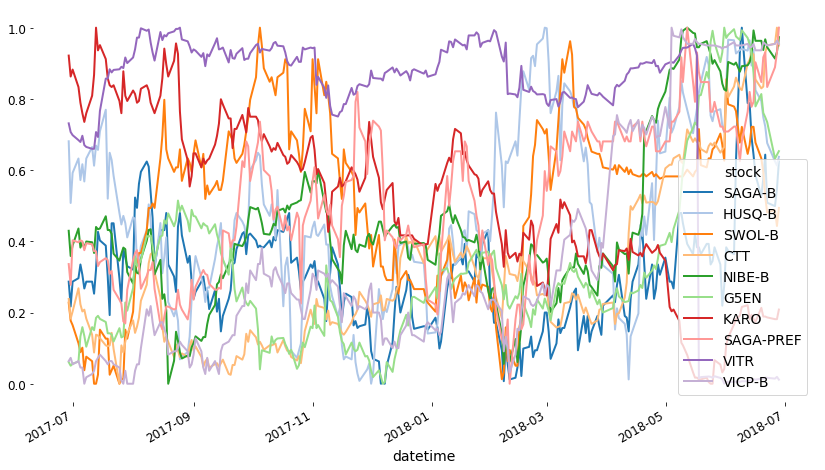

In [37]:
df_stock.sample(n=10, axis=1).rolling(1).mean().plot(lw=2)

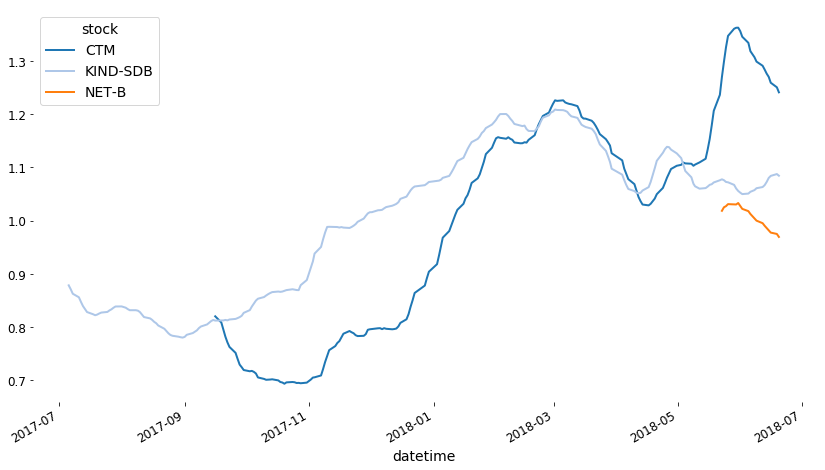

In [48]:
df_stock.rolling(10).mean().plot(lw=2)